# 6.3.4. Deducción del rotacional en coordenadas cilíndrica

In [1]:
import sympy as sp
from sympy import sin, cos, diff, simplify, Matrix

sp.init_printing()

In [2]:
r, t, z = sp.symbols('r, theta, z')

# se especifican "manualmente" las derivadas
dr_dx =  cos(t);     dr_dy =  sin(t)
dt_dx = -sin(t)/r;   dt_dy =  cos(t)/r

# se definen las primeras derivadas utilizando la regla de la cadena
d_dx = lambda f: diff(f,r)*dr_dx + diff(f,t)*dt_dx # + diff(f,z)*dz_dx (dz_dx = 0)
d_dy = lambda f: diff(f,r)*dr_dy + diff(f,t)*dt_dy # + diff(f,z)*dz_dy (dz_dy = 0)
d_dz = lambda f: diff(f,z)

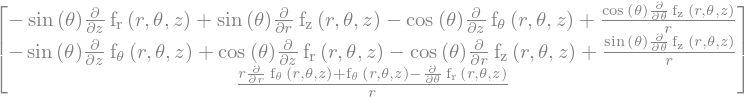

In [3]:
# se especifica que fr, ft y fz son funciones de r, t y z
fr = sp.Function('f_r')(r, t, z)
ft = sp.Function('f_theta')(r, t, z)
fz = sp.Function('f_z')(r, t, z)

# se definen las funciones fx y fy
fx = fr*cos(t) - ft*sin(t)
fy = fr*sin(t) + ft*cos(t)

# se especifica la divergencia en coordenadas rectangulares
rot_f_ijk = simplify(Matrix([[ d_dy(fz) - d_dz(fy) ],
                             [ d_dz(fx) - d_dx(fz) ],
                             [ d_dx(fy) - d_dy(fx) ]]))

rot_f_ijk

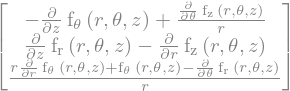

In [4]:
# se define la matriz de transformación T
T = Matrix([[ cos(t), -sin(t), 0 ],
            [ sin(t),  cos(t), 0 ],
            [      0,       0, 1 ]])

rot_f_rPtPzP = simplify(T.T * rot_f_ijk)

rot_f_rPtPzP